# Might Come Handy:
<br><br>
    https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/#comment-156701
<br><br>

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Using Time Series here ...


In [243]:
stock_prices = pd.read_csv(
    '../input_data/sbi_stock_prices.csv',
    parse_dates=['Date'],
    index_col="Date")
stock_prices.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-01-18,294.95,298.75,299.85,294.25,9.08M,-0.82%
2019-01-17,297.40,303.90,304.35,295.60,15.97M,-1.90%
2019-01-16,303.15,303.00,306.65,302.10,12.11M,0.50%
2019-01-15,301.65,302.00,303.60,301.10,9.44M,0.42%
2019-01-14,300.40,301.00,303.60,299.55,10.37M,-0.78%


In [244]:
stock_prices = stock_prices.drop(columns=["Change %", "Vol.", "Low", "Open", "High"])

## Applying some time series operations:

<br><br>

- Accessing range of rows based on slicing type :


In [245]:
print("On date 2019-01-14 \n", stock_prices["2019-01-14"])
print()
print("14Th Jan and Beyond \n", stock_prices[:"2019-01-14"])
print()
print("From 30Th Dec 2018 to Jan 2nd 2019 \n",
      stock_prices["2019-01-2":"2018-12-30"])
print()
print("All time contaning 2018-09 \n", stock_prices["2018-09"].head())

On date 2019-01-14 
             Price
Date             
2019-01-14  300.4

14Th Jan and Beyond 
              Price
Date              
2019-01-18  294.95
2019-01-17  297.40
2019-01-16  303.15
2019-01-15  301.65
2019-01-14  300.40

From 30Th Dec 2018 to Jan 2nd 2019 
             Price
Date             
2019-01-02  293.9
2019-01-01  299.6
2018-12-31  295.9

All time contaning 2018-09 
              Price
Date              
2018-09-28  265.50
2018-09-27  265.35
2018-09-26  263.85
2018-09-25  270.90
2018-09-24  264.35


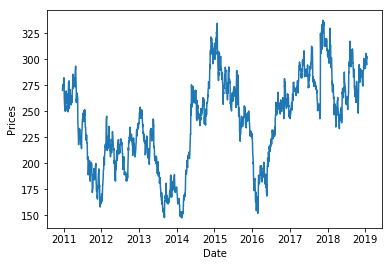

In [246]:
plt.plot(stock_prices.index, stock_prices["Price"].tolist())
plt.ylabel("Prices")
plt.xlabel("Date")
plt.show()

# Testing for Stationarity in Time Series:
<br>

- **Plotting Rolling Statistics:**
    - Constant Mean
    - Constant Vairance (Standard Deviation taken in this example)


- **Dickey-Fuller Test:**
           

In [247]:
from statsmodels.tsa.stattools import adfuller


def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    print(timeseries.head().iloc[:, 0].values)
    dftest = adfuller(timeseries.iloc[:, 0].values, autolag='AIC')
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            'Test Statistic', 'p-value', '#Lags Used',
            'Number of Observations Used'
        ])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

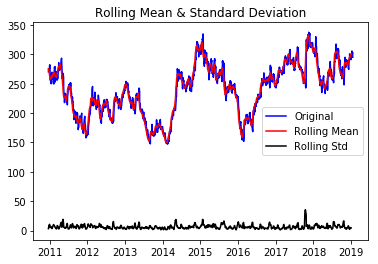

Results of Dickey-Fuller Test:
[294.95 297.4  303.15 301.65 300.4 ]
Test Statistic                   -2.847839
p-value                           0.051759
#Lags Used                        1.000000
Number of Observations Used    2003.000000
Critical Value (1%)              -3.433619
Critical Value (5%)              -2.862984
Critical Value (10%)             -2.567539
dtype: float64


In [248]:
test_stationarity(stock_prices)

# Using ARIMA:


In [249]:
from pyramid.arima import auto_arima

In [250]:
stock_prices = pd.read_csv(
    '../input_data/sbi_stock_prices.csv',
    parse_dates=['Date'],
    index_col="Date")
stock_prices = stock_prices.sort_index(ascending=True, axis=0)
stock_prices.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-12-20,270.05,275.00,275.00,269.00,24.81M,-2.26%
2010-12-21,274.38,270.93,276.50,270.93,19.61M,1.60%
2010-12-22,274.50,274.80,278.80,273.00,18.94M,0.04%
2010-12-23,274.62,275.50,276.79,273.51,11.99M,0.04%
2010-12-24,275.54,274.60,276.90,273.00,11.55M,0.34%


### We cannot use train_test_split() from model_selection from sklearn ... This is a time series data so it need to be in order ...


In [251]:
train_data = stock_prices[:1500]
test_data = stock_prices[1500:]

training = train_data["Price"]
validation = test_data["Price"]

In [252]:
model = auto_arima(
    training,
    start_p=1,
    start_q=1,
    max_p=3,
    max_q=3,
    m=12,
    start_P=0,
    seasonal=True,
    d=1,
    D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True)
model.fit(training)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=8846.989, BIC=8873.512, Fit time=11.299 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=9846.068, BIC=9856.677, Fit time=0.173 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=9392.120, BIC=9413.338, Fit time=2.242 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=8846.574, BIC=8867.792, Fit time=7.623 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=8848.572, BIC=8875.095, Fit time=9.972 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=9818.367, BIC=9834.280, Fit time=0.688 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=8848.572, BIC=8875.095, Fit time=35.780 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=8847.487, BIC=8879.314, Fit time=19.780 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=8862.570, BIC=8878.484, Fit time=6.002 seconds
Fit ARIMA: order=(0, 1, 2

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

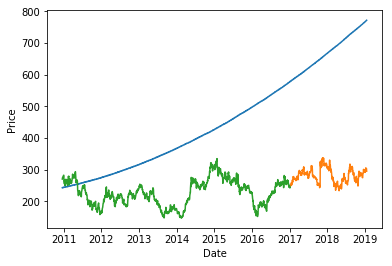

In [253]:
forecast = model.predict(n_periods=2005)
forecast = pd.DataFrame(
    forecast, index=stock_prices.index, columns=['Prediction'])

plt.plot(forecast.index, forecast["Prediction"])
plt.plot(test_data.index, test_data["Price"])
plt.plot(train_data.index, train_data["Price"])
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### Root Mean Squared Error:



#### The error is very high .. Very impractical ...

In [254]:
rms = np.sqrt(
    np.mean(
        np.power((np.array(stock_prices['Price']) - np.array(
            forecast['Prediction'])), 2)))
rms

253.3119748249469

# Using Prophet (From Facebook)

In [255]:
from fbprophet import Prophet

In [256]:
stock_prices = pd.read_csv(
    '../input_data/sbi_stock_prices.csv', parse_dates=['Date'])
stock_prices = stock_prices.sort_index(ascending=True, axis=0)

#train and validation
train = stock_prices[:1500]
valid = stock_prices[500:]

train.rename(columns={"Price": "y", "Date": "ds"}, inplace=True)

#fit the model
model = Prophet()
model.fit(train)

/home/codemantra/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [257]:
#predictions
prices = model.make_future_dataframe(periods=500)
forecast = model.predict(prices)


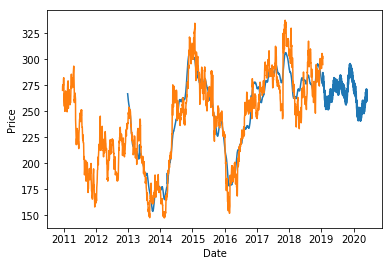

In [258]:
plt.plot(forecast["ds"], forecast["yhat"])
plt.plot(stock_prices["Date"], stock_prices["Price"])
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

## The root mean squared error is fairly low:


#### This might be consciderable but markets do not only depend upon past performance 


In [259]:
forecast_valid = forecast['yhat'][495:]
rms = np.sqrt(
    np.mean(np.power((np.array(valid['Price']) - np.array(forecast_valid)), 2)))
rms

63.549825222790616

# LSTM (Long Short Term Memory)


In [260]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [261]:
stock_prices = pd.read_csv(
    '../input_data/sbi_stock_prices.csv',
    parse_dates=['Date'],
    index_col="Date")
stock_prices = stock_prices.sort_index(ascending=True, axis=0)
stock_prices = stock_prices.drop(columns = ["Change %", "High", "Open", "Low", "Vol."])
stock_prices.head(2)

,Price
Date,
2010-12-20,270.05
2010-12-21,274.38


In [262]:
#train and validation
train = stock_prices[:1500]
valid = stock_prices[500:]

In [263]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_prices)

x_train, y_train = [], []
for i in range(60, len(train)):
    x_train.append(scaled_data[i - 60:i, 0])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [264]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [265]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 63s - loss: 0.0045


In [266]:
#predicting 246 values, using past 60 from the train data
inputs = stock_prices[len(stock_prices) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [267]:
X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)

In [268]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

### RSME is very low
     This can be used as a go to algo.

In [269]:
rms = np.sqrt(np.mean(np.power((valid - closing_price), 2)))
rms

Price    8.146705
dtype: float64

/home/codemantra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


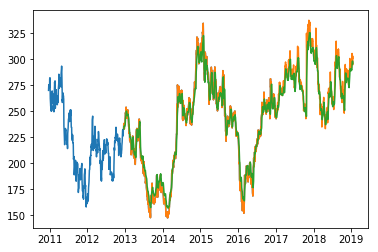

In [270]:
train = stock_prices[:1500]
valid = stock_prices[500:]
valid['Predictions'] = closing_price
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])